In [57]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd

from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\stone\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\stone\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\stone\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Importing the sentiment data. Need to encode with unicode escape probably due to unrecognized characters in a number of tweet_text values

df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='unicode_escape')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [4]:
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [5]:
df['tweet_text'].value_counts()

RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw                                 5
RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw                                              4
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #SXSW                                 4
RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #SXSW                                              3
RT @mention ÷¼ GO BEYOND BORDERS! ÷_ {link} ã_ #edchat #musedchat #sxsw #sxswi #classical #newTwitter                                       2
                                                                                                                                              ..
Great interview to @mention on Bloomberg TV about #Ipad2 to kick off #SxSW.#apple {link}                                          

In [6]:
df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [7]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [8]:
df.isnull().values.any()

True

In [9]:
df = df.replace(np.nan, 'Unknown')

Let's see what the most commonly tweeted words are

In [10]:
tokenized_review = []
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
for row in df['tweet_text']:
    for word in tokenizer.tokenize(row):
        tokenized_review.append(word)
#     except TypeError:
#         print(row)

tokenized_review

['wesley83',
 'I',
 'have',
 'a',
 '3G',
 'iPhone',
 'After',
 '3',
 'hrs',
 'tweeting',
 'at',
 'RISE',
 'Austin',
 'it',
 'was',
 'dead',
 'I',
 'need',
 'to',
 'upgrade',
 'Plugin',
 'stations',
 'at',
 'SXSW',
 'jessedee',
 'Know',
 'about',
 'fludapp',
 'Awesome',
 'iPad',
 'iPhone',
 'app',
 'that',
 'you',
 'll',
 'likely',
 'appreciate',
 'for',
 'its',
 'design',
 'Also',
 'they',
 're',
 'giving',
 'free',
 'Ts',
 'at',
 'SXSW',
 'swonderlin',
 'Can',
 'not',
 'wait',
 'for',
 'iPad',
 '2',
 'also',
 'They',
 'should',
 'sale',
 'them',
 'down',
 'at',
 'SXSW',
 'sxsw',
 'I',
 'hope',
 'this',
 'year',
 's',
 'festival',
 'isn',
 't',
 'as',
 'crashy',
 'as',
 'this',
 'year',
 's',
 'iPhone',
 'app',
 'sxsw',
 'sxtxstate',
 'great',
 'stuff',
 'on',
 'Fri',
 'SXSW',
 'Marissa',
 'Mayer',
 'Google',
 'Tim',
 'O',
 'Reilly',
 'tech',
 'books',
 'conferences',
 'amp',
 'Matt',
 'Mullenweg',
 'Wordpress',
 'teachntech00',
 'New',
 'iPad',
 'Apps',
 'For',
 'SpeechTherapy',
 'And

In [11]:
fdist = FreqDist(tokenized_review)
print(fdist)

<FreqDist with 12237 samples and 166995 outcomes>


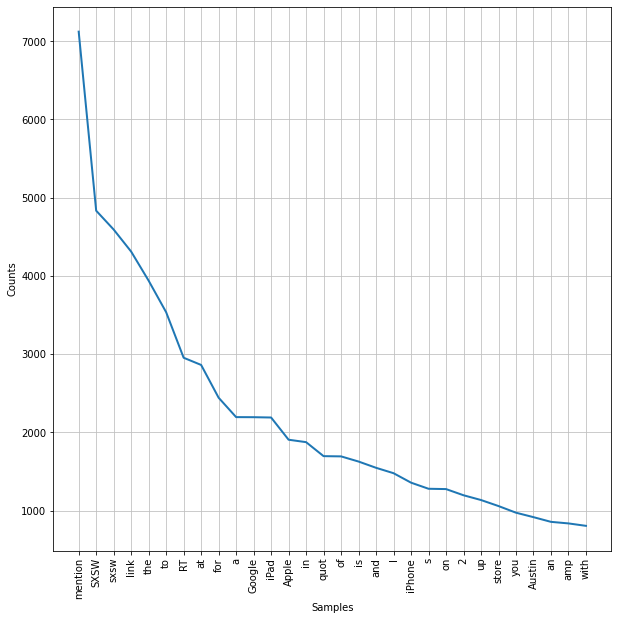

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [12]:
plt.figure(figsize=(10,10))
fdist.plot(30)

In [13]:
filtered_review = []

for w in tokenized_review:
    if w.lower() not in stopwords.words('english'):
        filtered_review.append(w.lower())

<FreqDist with 9549 samples and 114305 outcomes>


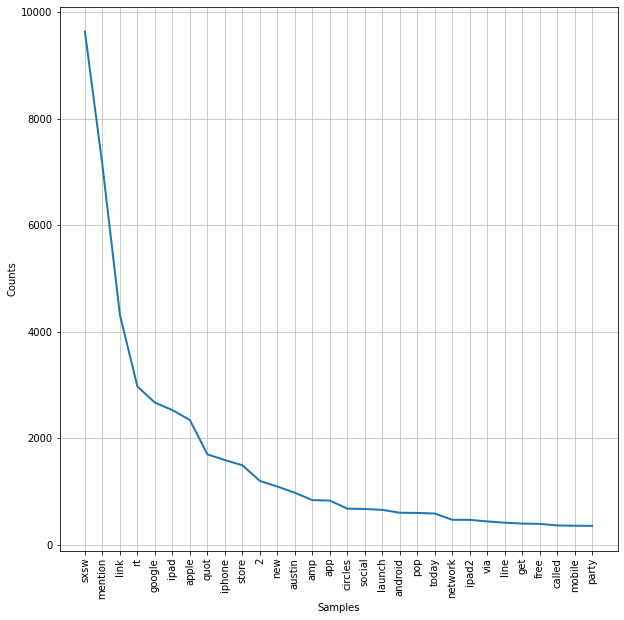

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [14]:
fdist = FreqDist(filtered_review)
print(fdist)
plt.figure(figsize=(10,10))
fdist.plot(30)

In [15]:
lemmatizer = WordNetLemmatizer()

lemmatized_review = []
for w in filtered_review:
    lemmatized_review.append(lemmatizer.lemmatize(w))


In [16]:
lemmatized_review

['wesley83',
 '3g',
 'iphone',
 '3',
 'hr',
 'tweeting',
 'rise',
 'austin',
 'dead',
 'need',
 'upgrade',
 'plugin',
 'station',
 'sxsw',
 'jessedee',
 'know',
 'fludapp',
 'awesome',
 'ipad',
 'iphone',
 'app',
 'likely',
 'appreciate',
 'design',
 'also',
 'giving',
 'free',
 't',
 'sxsw',
 'swonderlin',
 'wait',
 'ipad',
 '2',
 'also',
 'sale',
 'sxsw',
 'sxsw',
 'hope',
 'year',
 'festival',
 'crashy',
 'year',
 'iphone',
 'app',
 'sxsw',
 'sxtxstate',
 'great',
 'stuff',
 'fri',
 'sxsw',
 'marissa',
 'mayer',
 'google',
 'tim',
 'reilly',
 'tech',
 'book',
 'conference',
 'amp',
 'matt',
 'mullenweg',
 'wordpress',
 'teachntech00',
 'new',
 'ipad',
 'apps',
 'speechtherapy',
 'communication',
 'showcased',
 'sxsw',
 'conference',
 'http',
 'ht',
 'ly',
 '49n4m',
 'iear',
 'edchat',
 'asd',
 'unknown',
 'sxsw',
 'starting',
 'ctia',
 'around',
 'corner',
 'googleio',
 'hop',
 'skip',
 'jump',
 'good',
 'time',
 'android',
 'fan',
 'beautifully',
 'smart',
 'simple',
 'idea',
 'rt'

<FreqDist with 8800 samples and 114305 outcomes>


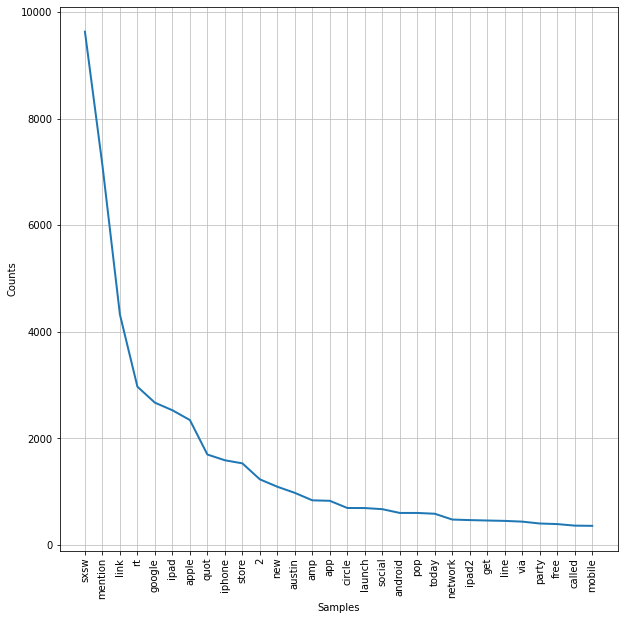

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
fdist = FreqDist(lemmatized_review)
print(fdist)
plt.figure(figsize=(10,10))
fdist.plot(30)

Words to add to stopword list: mention, link, rt, quot

In [23]:
sw_list = stopwords.words('english')
sw_list += ['mention', 'link', 'rt', 'quot']

Most Frequent Words

In [24]:
df_freq_positive = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion']
df_freq_negative = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']

In [25]:
data_positive = df_freq_positive['tweet_text']
data_negative = df_freq_negative['tweet_text']

In [26]:
data_positive

1       @jessedee Know about @fludapp ? Awesome iPad/i...
2       @swonderlin Can not wait for #iPad 2 also. The...
4       @sxtxstate great stuff on Fri #SXSW: Marissa M...
7       #SXSW is just starting, #CTIA is around the co...
8       Beautifully smart and simple idea RT @madebyma...
                              ...                        
9072    @mention your iPhone 4 cases are Rad and Ready...
9077    @mention your PR guy just convinced me to swit...
9079    &quot;papyrus...sort of like the ipad&quot; - ...
9085    I've always used Camera+ for my iPhone b/c it ...
9088                        Ipad everywhere. #SXSW {link}
Name: tweet_text, Length: 2978, dtype: object

In [27]:
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

data_positive = data_positive.apply(lambda x: tokenizer.tokenize(x))
data_negative = data_negative.apply(lambda x: tokenizer.tokenize(x))

<FreqDist with 4901 samples and 35919 outcomes>


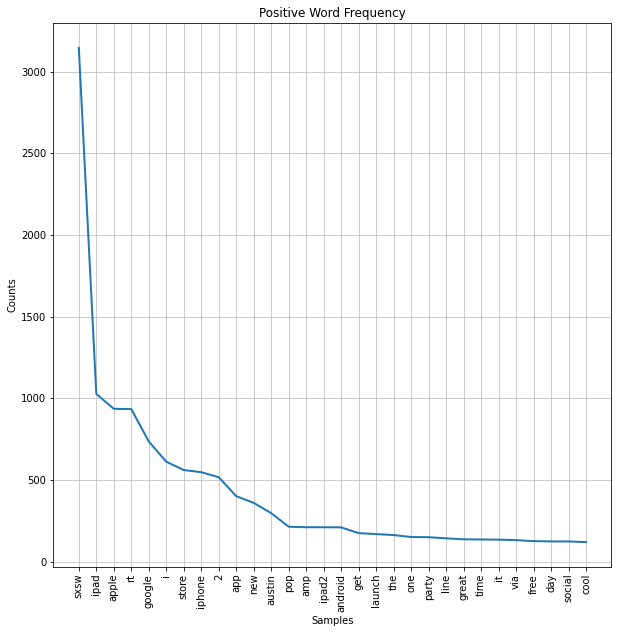

<AxesSubplot:title={'center':'Positive Word Frequency'}, xlabel='Samples', ylabel='Counts'>

In [28]:
tokenized_review = []
for row in data_positive:
    for w in row:
        if w not in sw_list:
            w = lemmatizer.lemmatize(w)
            tokenized_review.append(w.lower())

positive_fdist = FreqDist(tokenized_review)
print(positive_fdist)
plt.figure(figsize=(10,10))
plt.title('Positive Word Frequency')
positive_fdist.plot(30)

<FreqDist with 2023 samples and 7062 outcomes>


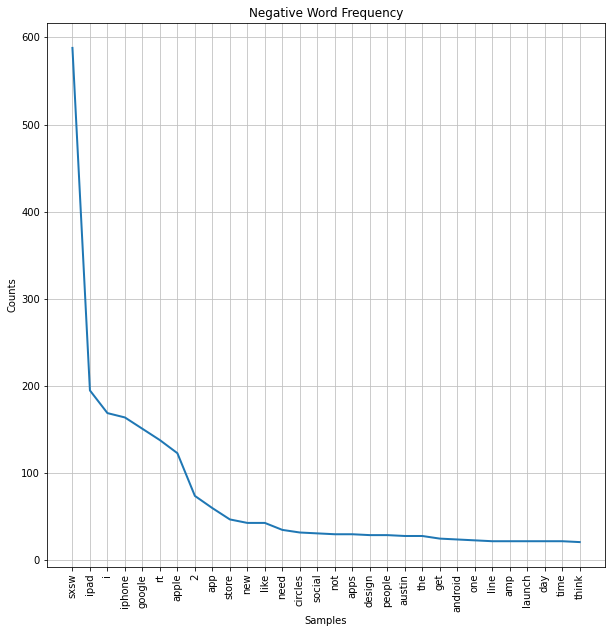

<AxesSubplot:title={'center':'Negative Word Frequency'}, xlabel='Samples', ylabel='Counts'>

In [29]:
tokenized_review = []
for row in data_negative:
    for w in row:
        if w not in sw_list:
            w = lemmatizer.lemmatize(w)
            tokenized_review.append(w.lower())

negative_fdist = FreqDist(tokenized_review)
print(negative_fdist)
plt.figure(figsize=(10,10))
plt.title('Negative Word Frequency')
negative_fdist.plot(30)

In [30]:
positive_fdist.most_common(20)

[('sxsw', 3145),
 ('ipad', 1027),
 ('apple', 936),
 ('rt', 934),
 ('google', 736),
 ('i', 612),
 ('store', 561),
 ('iphone', 548),
 ('2', 517),
 ('app', 401),
 ('new', 360),
 ('austin', 297),
 ('pop', 214),
 ('amp', 211),
 ('ipad2', 211),
 ('android', 210),
 ('get', 175),
 ('launch', 169),
 ('the', 163),
 ('one', 151)]

In [31]:
negative_fdist.most_common(20)

[('sxsw', 588),
 ('ipad', 195),
 ('i', 169),
 ('iphone', 164),
 ('google', 151),
 ('rt', 138),
 ('apple', 123),
 ('2', 74),
 ('app', 60),
 ('store', 47),
 ('new', 43),
 ('like', 43),
 ('need', 35),
 ('circles', 32),
 ('social', 31),
 ('not', 30),
 ('apps', 30),
 ('design', 29),
 ('people', 29),
 ('austin', 28)]

normalize frequencies

array([[<AxesSubplot:title={'center':'Frequency'}, xlabel='Word'>,
        <AxesSubplot:title={'center':'Normalized Frequency'}, xlabel='Word'>]],
      dtype=object)

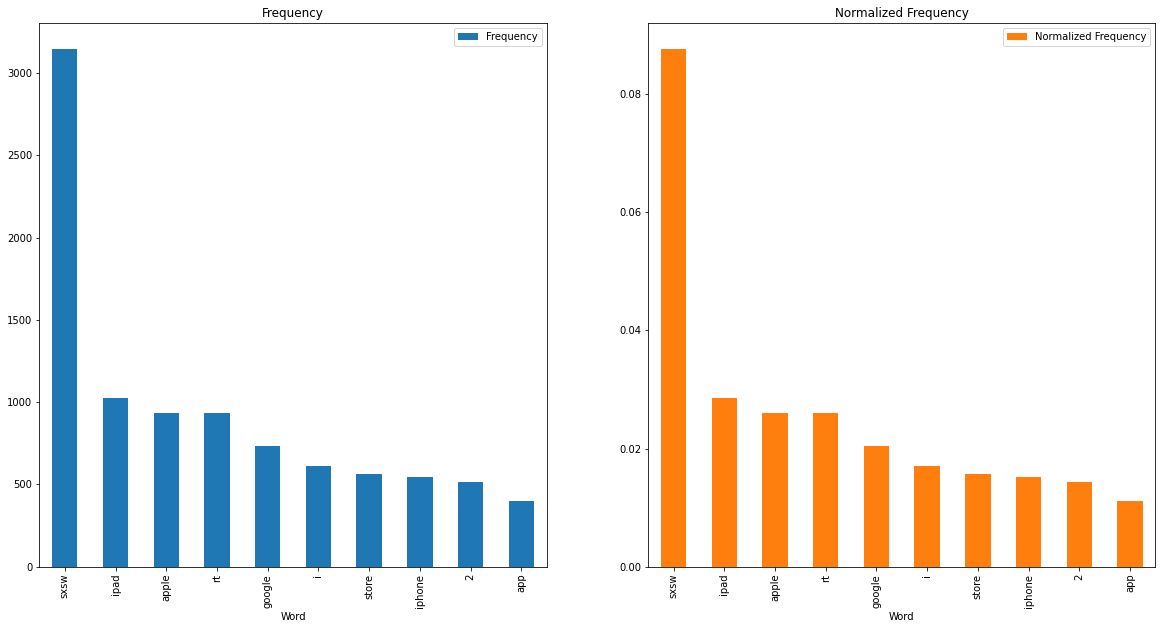

In [32]:
positive_total_word_count = sum(positive_fdist.values())
positive_tops = positive_fdist.most_common(20)
positive_frequency_df = pd.DataFrame(positive_tops, columns=['Word', 'Frequency'])
positive_frequency_df = positive_frequency_df.set_index('Word')
positive_frequency_df['Normalized Frequency'] = positive_frequency_df['Frequency']/positive_total_word_count
positive_frequency_df.nlargest(10, columns=['Frequency']).plot(kind='bar', subplots=True, sharex= False, layout=(1,2), figsize=(20,10))

<AxesSubplot:xlabel='Word'>

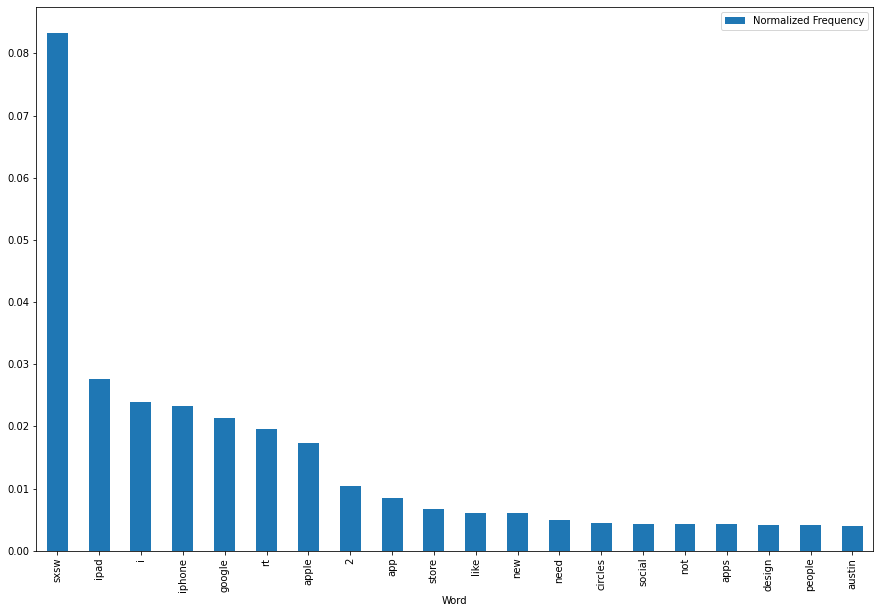

In [33]:
negative_total_word_count = sum(negative_fdist.values())
negative_tops = negative_fdist.most_common(20)
negative_frequency_df = pd.DataFrame(negative_tops, columns=['Word', 'Frequency'])
negative_frequency_df = negative_frequency_df.set_index('Word')
negative_frequency_df['Normalized Frequency'] = negative_frequency_df['Frequency']/negative_total_word_count
negative_frequency_df
negative_frequency_df.nlargest(20, columns=['Frequency']).plot(kind='bar', y = 'Normalized Frequency', figsize=(15,10))

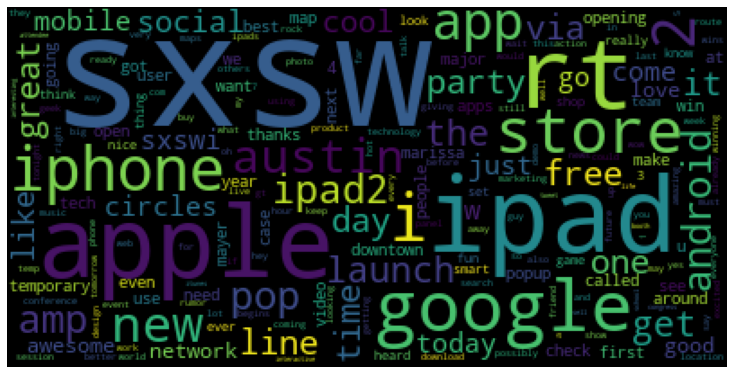

In [34]:

wordcloud = WordCloud().generate_from_frequencies(positive_fdist)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

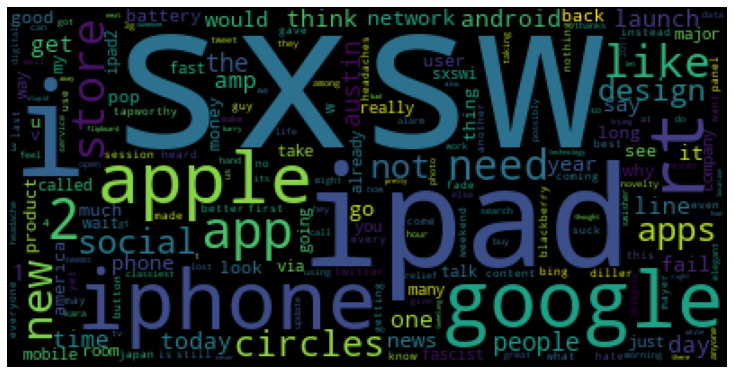

{'jessedee': 1,
 'know': 51,
 'fludapp': 1,
 'awesome': 95,
 'ipad': 1027,
 'iphone': 548,
 'app': 401,
 'likely': 2,
 'appreciate': 4,
 'design': 42,
 'also': 39,
 'giving': 32,
 'free': 126,
 'ts': 2,
 'sxsw': 3145,
 'swonderlin': 1,
 'can': 12,
 'wait': 39,
 '2': 517,
 'they': 32,
 'sale': 17,
 'sxtxstate': 4,
 'great': 137,
 'stuff': 17,
 'fri': 5,
 'marissa': 61,
 'mayer': 68,
 'google': 736,
 'tim': 9,
 'o': 8,
 'reilly': 2,
 'tech': 55,
 'book': 22,
 'conference': 46,
 'amp': 211,
 'matt': 4,
 'mullenweg': 2,
 'wordpress': 3,
 'starting': 7,
 'ctia': 2,
 'around': 67,
 'corner': 5,
 'googleio': 2,
 'hop': 3,
 'skip': 2,
 'jump': 5,
 'good': 93,
 'time': 136,
 'android': 210,
 'fan': 17,
 'beautifully': 2,
 'smart': 49,
 'simple': 5,
 'idea': 23,
 'rt': 934,
 'madebymany': 7,
 'thenextweb': 1,
 'wrote': 6,
 'hollergram': 23,
 'http': 14,
 'bit': 18,
 'ly': 15,
 'ieavob': 1,
 'counting': 2,
 'day': 124,
 'plus': 8,
 'strong': 6,
 'canadian': 6,
 'dollar': 7,
 'mean': 14,
 'stock':

In [35]:
wordcloud = WordCloud().generate_from_frequencies(negative_fdist)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()
dict(positive_fdist)

In [36]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",Unknown,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",Unknown,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,Unknown,No emotion toward brand or product


In [37]:
data = df['tweet_text']
target = df['is_there_an_emotion_directed_at_a_brand_or_product']

In [38]:
data

0       .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1       @jessedee Know about @fludapp ? Awesome iPad/i...
2       @swonderlin Can not wait for #iPad 2 also. The...
3       @sxsw I hope this year's festival isn't as cra...
4       @sxtxstate great stuff on Fri #SXSW: Marissa M...
                              ...                        
9088                        Ipad everywhere. #SXSW {link}
9089    Wave, buzz... RT @mention We interrupt your re...
9090    Google's Zeiger, a physician never reported po...
9091    Some Verizon iPhone customers complained their...
9092    Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...
Name: tweet_text, Length: 9093, dtype: object

In [39]:
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')


data = data.apply(lambda x: tokenizer.tokenize(x))


In [40]:
data

0       [wesley83, I, have, a, 3G, iPhone, After, 3, h...
1       [jessedee, Know, about, fludapp, Awesome, iPad...
2       [swonderlin, Can, not, wait, for, iPad, 2, als...
3       [sxsw, I, hope, this, year, s, festival, isn, ...
4       [sxtxstate, great, stuff, on, Fri, SXSW, Maris...
                              ...                        
9088                       [Ipad, everywhere, SXSW, link]
9089    [Wave, buzz, RT, mention, We, interrupt, your,...
9090    [Google, s, Zeiger, a, physician, never, repor...
9091    [Some, Verizon, iPhone, customers, complained,...
9092    [RT, mention, Google, Tests, Check, in, Offers...
Name: tweet_text, Length: 9093, dtype: object

In [41]:
data = data.apply(lambda row: [lemmatizer.lemmatize(x) for x in row])

In [42]:
target

0                         Negative emotion
1                         Positive emotion
2                         Positive emotion
3                         Negative emotion
4                         Positive emotion
                       ...                
9088                      Positive emotion
9089    No emotion toward brand or product
9090    No emotion toward brand or product
9091    No emotion toward brand or product
9092    No emotion toward brand or product
Name: is_there_an_emotion_directed_at_a_brand_or_product, Length: 9093, dtype: object

classify


In [43]:
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='unicode_escape')

df = df.replace(np.nan, 'Unknown')


tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
lemmatizer = WordNetLemmatizer()

r = []
data = []

for row in df['tweet_text']:
    for word in tokenizer.tokenize(row):
        r.append(lemmatizer.lemmatize(word))
    data.append(' '.join(r))
    r = []

data = pd.Series(data, name='tweet_text')

#         tokenized_review.append(word)
#
#
# lemmatized_review = []
# for w in filtered_review:
#     lemmatized_review.append(lemmatizer.lemmatize(w))


In [44]:
data

0       wesley83 I have a 3G iPhone After 3 hr tweetin...
1       jessedee Know about fludapp Awesome iPad iPhon...
2       swonderlin Can not wait for iPad 2 also They s...
3       sxsw I hope this year s festival isn t a crash...
4       sxtxstate great stuff on Fri SXSW Marissa Maye...
                              ...                        
9088                            Ipad everywhere SXSW link
9089    Wave buzz RT mention We interrupt your regular...
9090    Google s Zeiger a physician never reported pot...
9091    Some Verizon iPhone customer complained their ...
9092    RT mention Google Tests Check in Offers At SXS...
Name: tweet_text, Length: 9093, dtype: object

In [45]:
target

0                         Negative emotion
1                         Positive emotion
2                         Positive emotion
3                         Negative emotion
4                         Positive emotion
                       ...                
9088                      Positive emotion
9089    No emotion toward brand or product
9090    No emotion toward brand or product
9091    No emotion toward brand or product
9092    No emotion toward brand or product
Name: is_there_an_emotion_directed_at_a_brand_or_product, Length: 9093, dtype: object

In [53]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

tfidf = TfidfVectorizer(stop_words=sw_list)

tfidf_data_train = tfidf.fit_transform(X_train)
tfidf_data_test = tfidf.transform(X_test)

tfidf_data_train

<6819x7957 sparse matrix of type '<class 'numpy.float64'>'
	with 69605 stored elements in Compressed Sparse Row format>

In [54]:
non_zero_cols = tfidf_data_train.nnz / float(tfidf_data_train.shape[0])
print('Average Number of Non-Zero Elements in Vectorized Articles: {}'.format(non_zero_cols))

Average Number of Non-Zero Elements in Vectorized Articles: 10.207508432321454


In [55]:
percent_sparse = 1 - (non_zero_cols / float(tfidf_data_train.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Percentage of columns containing ZERO: 0.998717166214362


In [58]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [59]:
rf_classifier.fit(tfidf_data_train,y_train)

rf_train_preds = rf_classifier.predict(tfidf_data_train)
rf_test_preds = rf_classifier.predict(tfidf_data_test)

In [60]:
print(classification_report(y_train, rf_train_preds))

                                    precision    recall  f1-score   support

                      I can't tell       0.95      0.85      0.90       117
                  Negative emotion       0.97      0.94      0.95       426
No emotion toward brand or product       0.96      0.98      0.97      4039
                  Positive emotion       0.97      0.93      0.95      2237

                          accuracy                           0.96      6819
                         macro avg       0.96      0.93      0.94      6819
                      weighted avg       0.96      0.96      0.96      6819



In [61]:

print(classification_report(y_test, rf_test_preds))

                                    precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00        39
                  Negative emotion       0.66      0.19      0.29       144
No emotion toward brand or product       0.69      0.86      0.76      1350
                  Positive emotion       0.65      0.47      0.55       741

                          accuracy                           0.68      2274
                         macro avg       0.50      0.38      0.40      2274
                      weighted avg       0.66      0.68      0.65      2274



c:\users\stone\pycharmprojects\sentiment_analysis_nlp_project\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


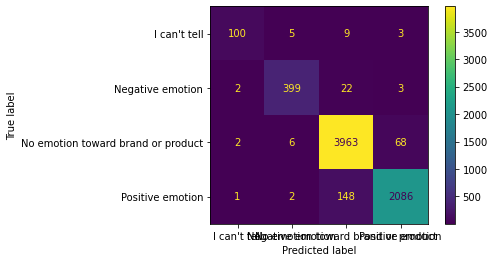

In [62]:
plot_confusion_matrix(rf_classifier, tfidf_data_train, y_train)

c:\users\stone\pycharmprojects\sentiment_analysis_nlp_project\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


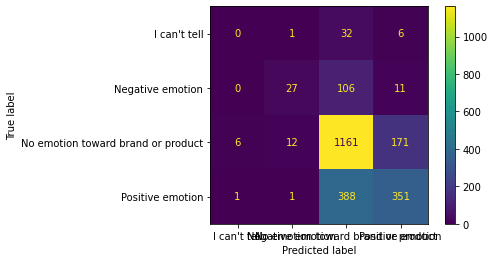

In [63]:
plot_confusion_matrix(rf_classifier, tfidf_data_test, y_test)

c:\users\stone\pycharmprojects\sentiment_analysis_nlp_project\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:ylabel='feat'>

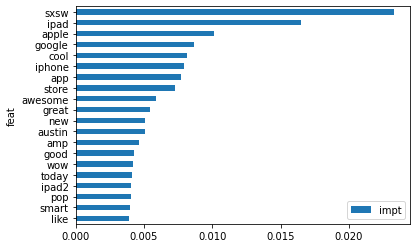

In [64]:
importances = sorted(list(zip(rf_classifier.feature_importances_, tfidf.get_feature_names())))[-20:]
impts = pd.DataFrame(importances, columns=['impt', 'feat'])
impts = impts.set_index('feat')
impts.plot(kind='barh')

In [65]:
for index, row in impts.sort_values('impt', ascending=False).iterrows():
    print(index)
    print('Positive Appearences: {}'.format(positive_fdist[index]))
    print('Negative Appearences: {}\n'.format(negative_fdist[index]))

sxsw
Positive Appearences: 3145
Negative Appearences: 588

ipad
Positive Appearences: 1027
Negative Appearences: 195

apple
Positive Appearences: 936
Negative Appearences: 123

google
Positive Appearences: 736
Negative Appearences: 151

cool
Positive Appearences: 120
Negative Appearences: 5

iphone
Positive Appearences: 548
Negative Appearences: 164

app
Positive Appearences: 401
Negative Appearences: 60

store
Positive Appearences: 561
Negative Appearences: 47

awesome
Positive Appearences: 95
Negative Appearences: 4

great
Positive Appearences: 137
Negative Appearences: 8

new
Positive Appearences: 360
Negative Appearences: 43

austin
Positive Appearences: 297
Negative Appearences: 28

amp
Positive Appearences: 211
Negative Appearences: 22

good
Positive Appearences: 93
Negative Appearences: 15

wow
Positive Appearences: 43
Negative Appearences: 3

today
Positive Appearences: 114
Negative Appearences: 21

ipad2
Positive Appearences: 211
Negative Appearences: 13

pop
Positive Appearen

re-do without no emotion, can't tell

In [66]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [67]:
filtered_df = df[(df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion') | (df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion')]

In [68]:
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
lemmatizer = WordNetLemmatizer()

r = []
data = []

for row in filtered_df['tweet_text']:
    for word in tokenizer.tokenize(row):
        r.append(lemmatizer.lemmatize(word))
    data.append(' '.join(r))
    r = []

data = pd.Series(data, name='tweet_text')
target = filtered_df['is_there_an_emotion_directed_at_a_brand_or_product']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

tfidf = TfidfVectorizer(stop_words=sw_list)

tfidf_data_train = tfidf.fit_transform(X_train)
tfidf_data_test = tfidf.transform(X_test)

tfidf_data_train

<2661x4810 sparse matrix of type '<class 'numpy.float64'>'
	with 27776 stored elements in Compressed Sparse Row format>

In [70]:

non_zero_cols = tfidf_data_train.nnz / float(tfidf_data_train.shape[0])
print('Average Number of Non-Zero Elements in Vectorized Articles: {}'.format(non_zero_cols))


Average Number of Non-Zero Elements in Vectorized Articles: 10.438181134911687


In [71]:
percent_sparse = 1 - (non_zero_cols / float(tfidf_data_train.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Percentage of columns containing ZERO: 0.9978298999719518


In [72]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [73]:
rf_classifier.fit(tfidf_data_train,y_train)

rf_train_preds = rf_classifier.predict(tfidf_data_train)
rf_test_preds = rf_classifier.predict(tfidf_data_test)

In [74]:
print(classification_report(y_train, rf_train_preds))


                  precision    recall  f1-score   support

Negative emotion       1.00      1.00      1.00       433
Positive emotion       1.00      1.00      1.00      2228

        accuracy                           1.00      2661
       macro avg       1.00      1.00      1.00      2661
    weighted avg       1.00      1.00      1.00      2661



In [75]:
print(classification_report(y_test, rf_test_preds))


                  precision    recall  f1-score   support

Negative emotion       0.84      0.30      0.44       137
Positive emotion       0.89      0.99      0.93       750

        accuracy                           0.88       887
       macro avg       0.86      0.64      0.69       887
    weighted avg       0.88      0.88      0.86       887



c:\users\stone\pycharmprojects\sentiment_analysis_nlp_project\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


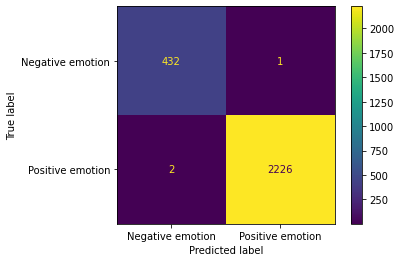

In [76]:
plot_confusion_matrix(rf_classifier, tfidf_data_train, y_train)


c:\users\stone\pycharmprojects\sentiment_analysis_nlp_project\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


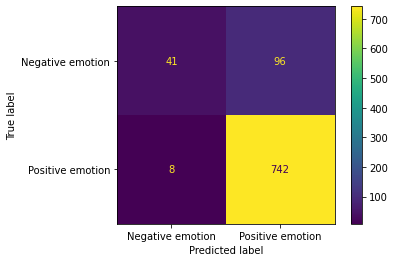

In [77]:
plot_confusion_matrix(rf_classifier, tfidf_data_test, y_test)


c:\users\stone\pycharmprojects\sentiment_analysis_nlp_project\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:ylabel='feat'>

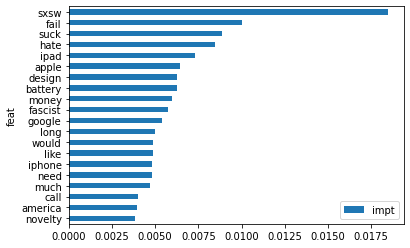

In [78]:
importances = sorted(list(zip(rf_classifier.feature_importances_, tfidf.get_feature_names())))[-20:]
impts = pd.DataFrame(importances, columns=['impt', 'feat'])
impts = impts.set_index('feat')
impts.plot(kind='barh')

In [79]:
for index, row in impts.sort_values('impt', ascending=False).iterrows():
    print(index)
    print('Positive Appearences: {}'.format(positive_fdist[index]))
    print('Negative Appearences: {}\n'.format(negative_fdist[index]))

sxsw
Positive Appearences: 3145
Negative Appearences: 588

fail
Positive Appearences: 7
Negative Appearences: 18

suck
Positive Appearences: 2
Negative Appearences: 10

hate
Positive Appearences: 0
Negative Appearences: 10

ipad
Positive Appearences: 1027
Negative Appearences: 195

apple
Positive Appearences: 936
Negative Appearences: 123

design
Positive Appearences: 42
Negative Appearences: 29

battery
Positive Appearences: 12
Negative Appearences: 17

money
Positive Appearences: 4
Negative Appearences: 14

fascist
Positive Appearences: 0
Negative Appearences: 14

google
Positive Appearences: 736
Negative Appearences: 151

long
Positive Appearences: 20
Negative Appearences: 17

would
Positive Appearences: 39
Negative Appearences: 19

like
Positive Appearences: 116
Negative Appearences: 43

iphone
Positive Appearences: 548
Negative Appearences: 164

need
Positive Appearences: 67
Negative Appearences: 35

much
Positive Appearences: 26
Negative Appearences: 15

call
Positive Appearences